<a href="https://colab.research.google.com/github/ZuhaFathima/hw117/blob/main/hw117.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
data_to_load = files.upload()

Saving BankNote_Authentication.csv to BankNote_Authentication.csv


In [2]:
import pandas as pd
df = pd.read_csv("BankNote_Authentication.csv")
print(df.head())

   variance  skewness  curtosis  entropy  class
0   3.62160    8.6661   -2.8073 -0.44699      0
1   4.54590    8.1674   -2.4586 -1.46210      0
2   3.86600   -2.6383    1.9242  0.10645      0
3   3.45660    9.5228   -4.0112 -3.59440      0
4   0.32924   -4.4552    4.5718 -0.98880      0


In [4]:
from sklearn.model_selection import train_test_split
vsce = df[["variance" , "skewness" , "curtosis" , "entropy"]]
classes = df["class"]

vsce_train, vsce_test,classes_train,classes_test =train_test_split(vsce, classes,test_size = 0.25, random_state = 0)

In [5]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
factors_train =sc_x.fit_transform(vsce_train)
factors_test =sc_x.transform(vsce_test)

In [6]:
from sklearn.linear_model import LogisticRegression
import numpy as np
# X = np.reshape(age_train.ravel(),(len(age_train), 1))
# Y =np.reshape(heart_attack_train.ravel(), (len(heart_attack_train), 1))
classifier =LogisticRegression(random_state= 0)
classifier.fit(vsce_train, classes_train)


LogisticRegression(random_state=0)

In [8]:
classes_prediction =classifier.predict(vsce_test)


In [9]:
predicted_values = []
for i in classes_prediction:
 if i == 0:
  predicted_values.append("No")
 else:
  predicted_values.append("Yes")
actual_values = []
for i in classes_test:
 if i == 0:
  actual_values.append("No")
 else:
  actual_values.append("Yes")

[Text(0, 0.5, 'Yes'), Text(0, 1.5, 'No')]

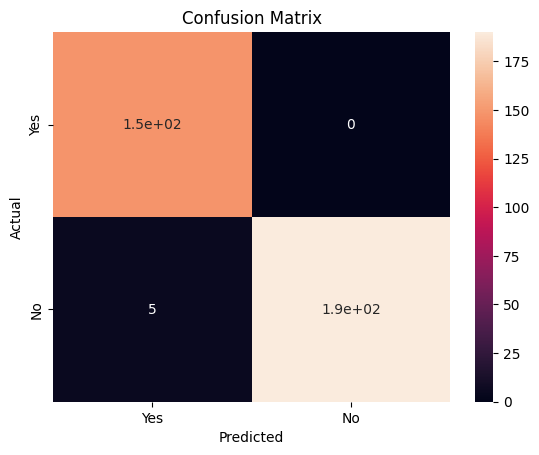

In [10]:

import seaborn as sns 
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix

labels = ["Yes", "No"]
cm =confusion_matrix(actual_values,predicted_values, labels=labels)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax =ax)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_title('Confusion Matrix')

ax.xaxis.set_ticklabels(labels);
ax.yaxis.set_ticklabels(labels)

In [12]:

accuracy = (1.5e+02+1.9e+02)/(1.5e+02+0+5+1.9e+02)
print(accuracy)

0.9855072463768116
